# * Kurapati Venkatesh

# * 09012021

# * Topic: Simple Linear Regression ✨

# ---------------------------------------------------------------------------

## Problem Statement:

## The Head HR of a certain organization wants to automate their salary hike estimation. The organization consulted an analytics service provider and asked them to build a basic prediction model by providing them with a sample data that contains historic data of the years of experience and the salary hike given accordingly over the past years. Approach - A Simple Linear regression model needs to be built with target variable ‘Salary’ to predict the salary hikeapply necessary transformations and record the RMSE values, Correlation coefficient values for different transformation models.

## -----------------------------------------------------------------------------------

### Problem Objective:
##### A Simple Linear regression model needs to be built with target variable ‘Salary’

## -------------------------------------------------------------------------------------------

## Import libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

## import dataset:

In [2]:
ys=pd.read_csv(r"G:\360digit\assignments meterial\SLR\Salary_Data.csv")

## Data Exploration:

In [4]:
ys.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
ys=ys.rename(columns={'YearsExperience': 'ye','Salary': 'sa' })

In [8]:
ys.head()

,ye,sa
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
ys.corr()

,ye,sa
ye,1.000000,0.978242
sa,0.978242,1.000000


Text(0, 0.5, 'Salary')

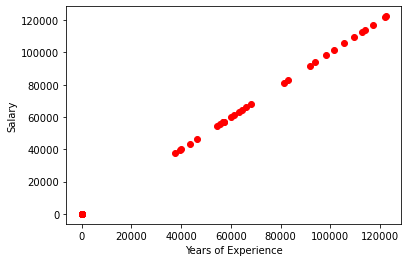

In [10]:
plt.scatter(x=ys, y=ys, color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

In [11]:
ys.describe()

,ye,sa
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Importing statsmodels.formula.api for linear regression model:

In [12]:
import statsmodels.formula.api as smf

In [13]:
model=smf.ols("sa~ye",data=ys).fit()

In [14]:
model.params

Intercept    25792.200199
ye            9449.962321
dtype: float64

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sa   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           1.14e-20
Time:                        22:01:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
ye          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The statistics we are mainly concerned with to determine whether the model is viable or not are:
* The coefficients and its p-value(significance)
* R-squared value
* F-statistic and its significance

### Inferences from model:

1. The coefficient for sh is 9449.9623, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
2. We have to make sure that the p-value should always be less for the coefficient to be significant.
3. R-squared value is 0.957, which means that 95.7% of the salary variance can be explained by the years of experience column using this line.
4. Prob F-statistic has a very low p-value, which gives us that the model fit is not a statistically significant.

In [16]:
model.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,21136.061314,30448.339084
ye,8674.118747,10225.805896


In [17]:
pred = model.predict(ys) # Predicted values of wg using the model

In [19]:
sqrt(mean_squared_error(ys.sa, pred))

5592.043608760662

### Visualization of regression line over the scatter plot of st & dt:

Text(0, 0.5, 'Salary')

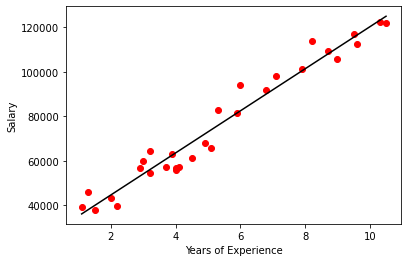

In [20]:
plt.scatter(x=ys.ye, y=ys.sa, color='red')
plt.plot(ys.ye, pred,color='black')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

In [21]:
pred.corr(ys.sa)

0.9782416184887601

### Transforming variables for accuracy:

In [22]:
model1 = smf.ols('sa~np.log(ye)',data=ys ).fit()

In [23]:
model1.params

Intercept     14927.97177
np.log(ye)    40581.98796
dtype: float64

In [24]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sa   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           3.25e-13
Time:                        22:04:44   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(ye)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inferences from model1:

1. The coefficient for dt is 4.058e+04, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
2. We have to make sure that the p-value should always be less for the coefficient to be significant.
3. R-squared value is 0.854, which means that 85.4% of the salary variance can be explained by the years of experience column using this line.
4. Prob F-statistic has a very low p-value, which gives us that the model fit is a statistically significant.

In [25]:
model1.conf_int(0.01)

,0,1
Intercept,679.965646,29175.977894
np.log(ye),31815.666558,49348.309362


In [26]:
pred1 = model1.predict(ys)

In [27]:
sqrt(mean_squared_error(ys.sa, pred1))

10302.893706228308

In [28]:
pred1.corr(ys.sa)

0.9240610817882637

## Conclusion:

Model having highest R-Squared value is better i.e. (model=0.957 is better than model1= 0.854). There has good relationship>0.85